In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
sess = tf.Session(config = tf.ConfigProto(log_device_placement = True))

import keras
keras.backend.set_session(sess)
keras.backend.clear_session()

from CP_Detection.Preprocessing import DataPrep
from CP_Detection.Model import Conv1dAE
from CP_Detection.Visualization import PlotApproachCurve
from CP_Detection.IOtools import SaveModel, LoadModel

Using TensorFlow backend.


Number of test samples : 31
Number of training samples : 279
(14, 310)


Text(0.5, 0.98, 'Amplitude and Phase Curves for the Test Dataset (31 curves)')

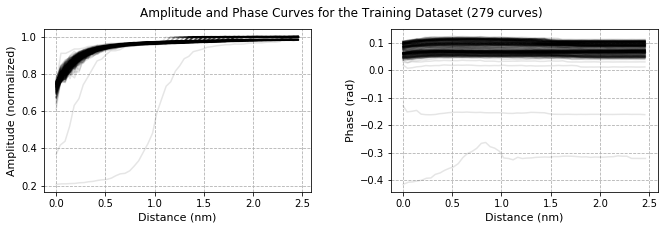

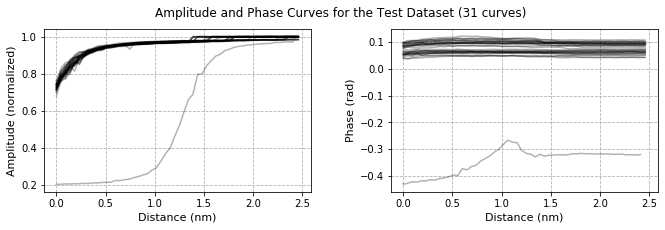

In [2]:
# filepath to the reformatted data file
filepath = '/home/jhko725/Projects/Jhe_Lab/CP_Detection/Raw_Data/DohyunBest_deriv3.npz'
test_ratio = 0.1

train_dataset, test_dataset, train, test = DataPrep(filepath, test_ratio)

# Graph the training set
fig1 = PlotApproachCurve(train, alpha = 0.1)
fig1.suptitle('Amplitude and Phase Curves for the Training Dataset (%d curves)' %(train.shape[0]), fontsize = 12)

fig2 = PlotApproachCurve(test, alpha = 0.3)
fig2.suptitle('Amplitude and Phase Curves for the Test Dataset (%d curves)' %(test.shape[0]), fontsize = 12)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence_Input (InputLayer)     (None, 54, 2)        0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 54, 32)       352         Sequence_Input[0][0]             
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 54, 32)       128         conv1d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 54, 32)       0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
dropout_1 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence_Input (InputLayer)     (None, 54, 2)        0                                            
__________________________________________________________________________________________________
Constant_Input (InputLayer)     (None, 54, 2)        0                                            
__________________________________________________________________________________________________
Encoder (Model)                 (None, 54, 1)        18389       Sequence_Input[0][0]             
                                                                 Constant_Input[0][0]             
__________________________________________________________________________________________________
Decoder (Model)                 (None, 54, 2)        18238       Encoder[1][0]                    
          

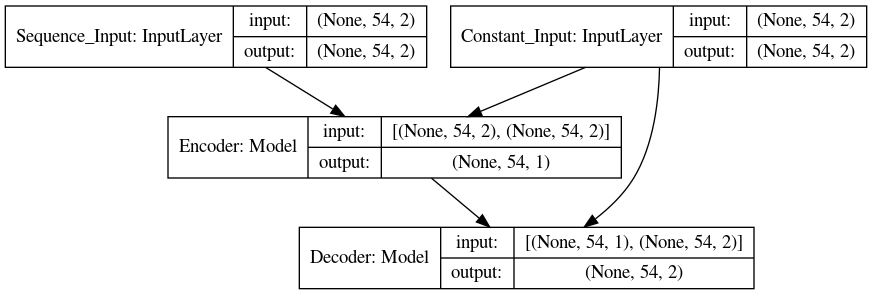

In [3]:
seq_length = train.shape[1]
abstraction_block = 'C:32|C:32|C:32|C:32'
composition_block = 'P:32|P:16|P:8|P:4'

model, hyperparameters = Conv1dAE(seq_length = seq_length, abstraction_block = abstraction_block, 
                                  composition_block = composition_block, dropout_rate = 0.3, lr = 1e-4)

autoencoder = model['autoencoder']
encoder = model['encoder']

from keras.utils.vis_utils import plot_model
plot_model(autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(filename='model_plot.png') 

In [ ]:
batch_size = hyperparameters['batch_size']
autoencoder.fit(x = [train[:,:,1:3], train[:,:,3:]], y = train[:,:,1:3], epochs = 70000, batch_size = batch_size, validation_data = ([test[:,:,1:3], test[:,:,3:]], test[:,:,1:3]))


Train on 279 samples, validate on 31 samples
Epoch 1/70000
279/279 [==============================] - 6s 20ms/step - loss: 3.5518 - val_loss: 1.8474
Epoch 2/70000
279/279 [==============================] - 0s 625us/step - loss: 3.4367 - val_loss: 1.9336
Epoch 3/70000
279/279 [==============================] - 0s 639us/step - loss: 3.4362 - val_loss: 1.8892
Epoch 4/70000
279/279 [==============================] - 0s 624us/step - loss: 3.3788 - val_loss: 1.9349
Epoch 5/70000
279/279 [==============================] - 0s 652us/step - loss: 3.3084 - val_loss: 1.9075
Epoch 6/70000
279/279 [==============================] - 0s 631us/step - loss: 3.0378 - val_loss: 1.8149
Epoch 7/70000
279/279 [==============================] - 0s 620us/step - loss: 2.9386 - val_loss: 1.7584
Epoch 8/70000
279/279 [==============================] - 0s 636us/step - loss: 2.7679 - val_loss: 1.6907
Epoch 9/70000
279/279 [==============================] - 0s 623us/step - loss: 2.7637 - val_loss: 1.6474
Epoch 10/70

Epoch 78/70000
279/279 [==============================] - 0s 627us/step - loss: 1.2184 - val_loss: 0.8245
Epoch 79/70000
279/279 [==============================] - 0s 626us/step - loss: 1.1644 - val_loss: 0.8200
Epoch 80/70000
279/279 [==============================] - 0s 651us/step - loss: 1.2376 - val_loss: 0.8183
Epoch 81/70000
279/279 [==============================] - 0s 643us/step - loss: 1.1959 - val_loss: 0.8179
Epoch 82/70000
279/279 [==============================] - 0s 631us/step - loss: 1.2037 - val_loss: 0.8181
Epoch 83/70000
279/279 [==============================] - 0s 630us/step - loss: 1.2088 - val_loss: 0.8166
Epoch 84/70000
279/279 [==============================] - 0s 651us/step - loss: 1.2031 - val_loss: 0.8153
Epoch 85/70000
279/279 [==============================] - 0s 634us/step - loss: 1.1773 - val_loss: 0.8134
Epoch 86/70000
279/279 [==============================] - 0s 626us/step - loss: 1.1674 - val_loss: 0.8111
Epoch 87/70000
279/279 [======================

Epoch 155/70000
279/279 [==============================] - 0s 621us/step - loss: 0.9239 - val_loss: 0.7553
Epoch 156/70000
279/279 [==============================] - 0s 623us/step - loss: 0.9095 - val_loss: 0.7530
Epoch 157/70000
279/279 [==============================] - 0s 624us/step - loss: 0.8926 - val_loss: 0.7503
Epoch 158/70000
279/279 [==============================] - 0s 613us/step - loss: 0.8664 - val_loss: 0.7433
Epoch 159/70000
279/279 [==============================] - 0s 622us/step - loss: 0.8892 - val_loss: 0.7397
Epoch 160/70000
279/279 [==============================] - 0s 614us/step - loss: 0.8769 - val_loss: 0.7408
Epoch 161/70000
279/279 [==============================] - 0s 616us/step - loss: 0.9119 - val_loss: 0.7406
Epoch 162/70000
279/279 [==============================] - 0s 616us/step - loss: 0.8649 - val_loss: 0.7388
Epoch 163/70000
279/279 [==============================] - 0s 620us/step - loss: 0.8383 - val_loss: 0.7351
Epoch 164/70000
279/279 [============

279/279 [==============================] - 0s 621us/step - loss: 0.7249 - val_loss: 0.7034
Epoch 232/70000
279/279 [==============================] - 0s 625us/step - loss: 0.7162 - val_loss: 0.7050
Epoch 233/70000
279/279 [==============================] - 0s 631us/step - loss: 0.7154 - val_loss: 0.7007
Epoch 234/70000
279/279 [==============================] - 0s 620us/step - loss: 0.6897 - val_loss: 0.6929
Epoch 235/70000
279/279 [==============================] - 0s 614us/step - loss: 0.7167 - val_loss: 0.6834
Epoch 236/70000
279/279 [==============================] - 0s 620us/step - loss: 0.7150 - val_loss: 0.6771
Epoch 237/70000
279/279 [==============================] - 0s 630us/step - loss: 0.7051 - val_loss: 0.6715
Epoch 238/70000
279/279 [==============================] - 0s 647us/step - loss: 0.6956 - val_loss: 0.6648
Epoch 239/70000
279/279 [==============================] - 0s 649us/step - loss: 0.7130 - val_loss: 0.6646
Epoch 240/70000
279/279 [============================

279/279 [==============================] - 0s 651us/step - loss: 0.5796 - val_loss: 0.5927
Epoch 308/70000
279/279 [==============================] - 0s 680us/step - loss: 0.5535 - val_loss: 0.5886
Epoch 309/70000
279/279 [==============================] - 0s 646us/step - loss: 0.5556 - val_loss: 0.5856
Epoch 310/70000
279/279 [==============================] - 0s 632us/step - loss: 0.5801 - val_loss: 0.5846
Epoch 311/70000
279/279 [==============================] - 0s 645us/step - loss: 0.5700 - val_loss: 0.5836
Epoch 312/70000
279/279 [==============================] - 0s 666us/step - loss: 0.5614 - val_loss: 0.5850
Epoch 313/70000
279/279 [==============================] - 0s 671us/step - loss: 0.5577 - val_loss: 0.5872
Epoch 314/70000
279/279 [==============================] - 0s 634us/step - loss: 0.5600 - val_loss: 0.5874
Epoch 315/70000
279/279 [==============================] - 0s 638us/step - loss: 0.5793 - val_loss: 0.5894
Epoch 316/70000
279/279 [============================

279/279 [==============================] - 0s 651us/step - loss: 0.4733 - val_loss: 0.5446
Epoch 384/70000
279/279 [==============================] - 0s 617us/step - loss: 0.4776 - val_loss: 0.5444
Epoch 385/70000
279/279 [==============================] - 0s 631us/step - loss: 0.4763 - val_loss: 0.5467
Epoch 386/70000
279/279 [==============================] - 0s 620us/step - loss: 0.4826 - val_loss: 0.5538
Epoch 387/70000
279/279 [==============================] - 0s 628us/step - loss: 0.4800 - val_loss: 0.5563
Epoch 388/70000
279/279 [==============================] - 0s 624us/step - loss: 0.4586 - val_loss: 0.5529
Epoch 389/70000
279/279 [==============================] - 0s 617us/step - loss: 0.4831 - val_loss: 0.5505
Epoch 390/70000
279/279 [==============================] - 0s 621us/step - loss: 0.4713 - val_loss: 0.5474
Epoch 391/70000
279/279 [==============================] - 0s 618us/step - loss: 0.4489 - val_loss: 0.5410
Epoch 392/70000
279/279 [============================

279/279 [==============================] - 0s 625us/step - loss: 0.3969 - val_loss: 0.5061
Epoch 460/70000
279/279 [==============================] - 0s 617us/step - loss: 0.3871 - val_loss: 0.5032
Epoch 461/70000
279/279 [==============================] - 0s 621us/step - loss: 0.4013 - val_loss: 0.5027
Epoch 462/70000
279/279 [==============================] - 0s 619us/step - loss: 0.3896 - val_loss: 0.4976
Epoch 463/70000
279/279 [==============================] - 0s 623us/step - loss: 0.3801 - val_loss: 0.4909
Epoch 464/70000
279/279 [==============================] - 0s 619us/step - loss: 0.3854 - val_loss: 0.4891
Epoch 465/70000
279/279 [==============================] - 0s 620us/step - loss: 0.3912 - val_loss: 0.4879
Epoch 466/70000
279/279 [==============================] - 0s 624us/step - loss: 0.3994 - val_loss: 0.4860
Epoch 467/70000
279/279 [==============================] - 0s 620us/step - loss: 0.3863 - val_loss: 0.4856
Epoch 468/70000
279/279 [============================

279/279 [==============================] - 0s 634us/step - loss: 0.3386 - val_loss: 0.4495
Epoch 536/70000
279/279 [==============================] - 0s 619us/step - loss: 0.3276 - val_loss: 0.4492
Epoch 537/70000
279/279 [==============================] - 0s 618us/step - loss: 0.3321 - val_loss: 0.4489
Epoch 538/70000
279/279 [==============================] - 0s 624us/step - loss: 0.3237 - val_loss: 0.4485
Epoch 539/70000
279/279 [==============================] - 0s 634us/step - loss: 0.3277 - val_loss: 0.4475
Epoch 540/70000
279/279 [==============================] - 0s 635us/step - loss: 0.3237 - val_loss: 0.4473
Epoch 541/70000
279/279 [==============================] - 0s 624us/step - loss: 0.3259 - val_loss: 0.4471
Epoch 542/70000
279/279 [==============================] - 0s 632us/step - loss: 0.3148 - val_loss: 0.4461
Epoch 543/70000
279/279 [==============================] - 0s 641us/step - loss: 0.3367 - val_loss: 0.4455
Epoch 544/70000
279/279 [============================

279/279 [==============================] - 0s 626us/step - loss: 0.3100 - val_loss: 0.4129
Epoch 612/70000
279/279 [==============================] - 0s 631us/step - loss: 0.2862 - val_loss: 0.4142
Epoch 613/70000
279/279 [==============================] - 0s 626us/step - loss: 0.2776 - val_loss: 0.4145
Epoch 614/70000
279/279 [==============================] - 0s 653us/step - loss: 0.2666 - val_loss: 0.4146
Epoch 615/70000
279/279 [==============================] - 0s 619us/step - loss: 0.2751 - val_loss: 0.4145
Epoch 616/70000
279/279 [==============================] - 0s 625us/step - loss: 0.2718 - val_loss: 0.4142
Epoch 617/70000
279/279 [==============================] - 0s 620us/step - loss: 0.2764 - val_loss: 0.4137
Epoch 618/70000
279/279 [==============================] - 0s 621us/step - loss: 0.2745 - val_loss: 0.4119
Epoch 619/70000
279/279 [==============================] - 0s 617us/step - loss: 0.2763 - val_loss: 0.4102
Epoch 620/70000
279/279 [============================

279/279 [==============================] - 0s 630us/step - loss: 0.2371 - val_loss: 0.3823
Epoch 688/70000
279/279 [==============================] - 0s 614us/step - loss: 0.2346 - val_loss: 0.3819
Epoch 689/70000
279/279 [==============================] - 0s 615us/step - loss: 0.2278 - val_loss: 0.3819
Epoch 690/70000
279/279 [==============================] - 0s 625us/step - loss: 0.2387 - val_loss: 0.3812
Epoch 691/70000
279/279 [==============================] - 0s 616us/step - loss: 0.2333 - val_loss: 0.3808
Epoch 692/70000
279/279 [==============================] - 0s 615us/step - loss: 0.2315 - val_loss: 0.3801
Epoch 693/70000
279/279 [==============================] - 0s 636us/step - loss: 0.2365 - val_loss: 0.3800
Epoch 694/70000
279/279 [==============================] - 0s 620us/step - loss: 0.2345 - val_loss: 0.3803
Epoch 695/70000
279/279 [==============================] - 0s 615us/step - loss: 0.2223 - val_loss: 0.3805
Epoch 696/70000
279/279 [============================

279/279 [==============================] - 0s 628us/step - loss: 0.2491 - val_loss: 0.3223
Epoch 764/70000
279/279 [==============================] - 0s 622us/step - loss: 0.2030 - val_loss: 0.2656
Epoch 765/70000
279/279 [==============================] - 0s 613us/step - loss: 0.2070 - val_loss: 0.2686
Epoch 766/70000
279/279 [==============================] - 0s 623us/step - loss: 0.2033 - val_loss: 0.2862
Epoch 767/70000
279/279 [==============================] - 0s 619us/step - loss: 0.2045 - val_loss: 0.2821
Epoch 768/70000
279/279 [==============================] - 0s 627us/step - loss: 0.1935 - val_loss: 0.2919
Epoch 769/70000
279/279 [==============================] - 0s 633us/step - loss: 0.2030 - val_loss: 0.3209
Epoch 770/70000
279/279 [==============================] - 0s 624us/step - loss: 0.2002 - val_loss: 0.3024
Epoch 771/70000
279/279 [==============================] - 0s 622us/step - loss: 0.1904 - val_loss: 0.2775
Epoch 772/70000
279/279 [============================

279/279 [==============================] - 0s 626us/step - loss: 0.1720 - val_loss: 0.1981
Epoch 840/70000
279/279 [==============================] - 0s 621us/step - loss: 0.1735 - val_loss: 0.1955
Epoch 841/70000
279/279 [==============================] - 0s 623us/step - loss: 0.1686 - val_loss: 0.1958
Epoch 842/70000
279/279 [==============================] - 0s 623us/step - loss: 0.1688 - val_loss: 0.1994
Epoch 843/70000
279/279 [==============================] - 0s 624us/step - loss: 0.1661 - val_loss: 0.1992
Epoch 844/70000
279/279 [==============================] - 0s 627us/step - loss: 0.1672 - val_loss: 0.1989
Epoch 845/70000
279/279 [==============================] - 0s 626us/step - loss: 0.1723 - val_loss: 0.1989
Epoch 846/70000
279/279 [==============================] - 0s 621us/step - loss: 0.1674 - val_loss: 0.1993
Epoch 847/70000
279/279 [==============================] - 0s 617us/step - loss: 0.1655 - val_loss: 0.1995
Epoch 848/70000
279/279 [============================

279/279 [==============================] - 0s 627us/step - loss: 0.1508 - val_loss: 0.1730
Epoch 916/70000
279/279 [==============================] - 0s 626us/step - loss: 0.1435 - val_loss: 0.1724
Epoch 917/70000
279/279 [==============================] - 0s 616us/step - loss: 0.1446 - val_loss: 0.1719
Epoch 918/70000
279/279 [==============================] - 0s 624us/step - loss: 0.1511 - val_loss: 0.1716
Epoch 919/70000
279/279 [==============================] - 0s 619us/step - loss: 0.1457 - val_loss: 0.1710
Epoch 920/70000
279/279 [==============================] - 0s 624us/step - loss: 0.1432 - val_loss: 0.1704
Epoch 921/70000
279/279 [==============================] - 0s 625us/step - loss: 0.1434 - val_loss: 0.1701
Epoch 922/70000
279/279 [==============================] - 0s 617us/step - loss: 0.1468 - val_loss: 0.1700
Epoch 923/70000
279/279 [==============================] - 0s 614us/step - loss: 0.1442 - val_loss: 0.1698
Epoch 924/70000
279/279 [============================

279/279 [==============================] - 0s 619us/step - loss: 0.1209 - val_loss: 0.1545
Epoch 992/70000
279/279 [==============================] - 0s 622us/step - loss: 0.1250 - val_loss: 0.1542
Epoch 993/70000
279/279 [==============================] - 0s 619us/step - loss: 0.1268 - val_loss: 0.1545
Epoch 994/70000
279/279 [==============================] - 0s 625us/step - loss: 0.1265 - val_loss: 0.1504
Epoch 995/70000
279/279 [==============================] - 0s 617us/step - loss: 0.1266 - val_loss: 0.1504
Epoch 996/70000
279/279 [==============================] - 0s 622us/step - loss: 0.1208 - val_loss: 0.1502
Epoch 997/70000
279/279 [==============================] - 0s 627us/step - loss: 0.1275 - val_loss: 0.1498
Epoch 998/70000
279/279 [==============================] - 0s 620us/step - loss: 0.1216 - val_loss: 0.1498
Epoch 999/70000
279/279 [==============================] - 0s 620us/step - loss: 0.1282 - val_loss: 0.1500
Epoch 1000/70000
279/279 [===========================

279/279 [==============================] - 0s 634us/step - loss: 0.1073 - val_loss: 0.1383
Epoch 1068/70000
279/279 [==============================] - 0s 624us/step - loss: 0.1034 - val_loss: 0.1388
Epoch 1069/70000
279/279 [==============================] - 0s 619us/step - loss: 0.1063 - val_loss: 0.1390
Epoch 1070/70000
279/279 [==============================] - 0s 619us/step - loss: 0.1099 - val_loss: 0.1387
Epoch 1071/70000
279/279 [==============================] - 0s 622us/step - loss: 0.1064 - val_loss: 0.1384
Epoch 1072/70000
279/279 [==============================] - 0s 623us/step - loss: 0.1062 - val_loss: 0.1375
Epoch 1073/70000
279/279 [==============================] - 0s 621us/step - loss: 0.1045 - val_loss: 0.1374
Epoch 1074/70000
279/279 [==============================] - 0s 625us/step - loss: 0.1042 - val_loss: 0.1373
Epoch 1075/70000
279/279 [==============================] - 0s 619us/step - loss: 0.1031 - val_loss: 0.1373
Epoch 1076/70000
279/279 [===================

279/279 [==============================] - 0s 624us/step - loss: 0.0926 - val_loss: 0.1280
Epoch 1144/70000
279/279 [==============================] - 0s 622us/step - loss: 0.0895 - val_loss: 0.1242
Epoch 1145/70000
279/279 [==============================] - 0s 613us/step - loss: 0.0924 - val_loss: 0.1233
Epoch 1146/70000
279/279 [==============================] - 0s 620us/step - loss: 0.0889 - val_loss: 0.1260
Epoch 1147/70000
279/279 [==============================] - 0s 624us/step - loss: 0.0881 - val_loss: 0.1259
Epoch 1148/70000
279/279 [==============================] - 0s 624us/step - loss: 0.0904 - val_loss: 0.1273
Epoch 1149/70000
279/279 [==============================] - 0s 619us/step - loss: 0.0928 - val_loss: 0.1278
Epoch 1150/70000
279/279 [==============================] - 0s 615us/step - loss: 0.0875 - val_loss: 0.1281
Epoch 1151/70000
279/279 [==============================] - 0s 618us/step - loss: 0.0886 - val_loss: 0.1282
Epoch 1152/70000
279/279 [===================

279/279 [==============================] - 0s 647us/step - loss: 0.0761 - val_loss: 0.1152
Epoch 1220/70000
279/279 [==============================] - 0s 637us/step - loss: 0.0754 - val_loss: 0.1138
Epoch 1221/70000
279/279 [==============================] - 0s 651us/step - loss: 0.0800 - val_loss: 0.1136
Epoch 1222/70000
279/279 [==============================] - 0s 628us/step - loss: 0.0801 - val_loss: 0.1131
Epoch 1223/70000
279/279 [==============================] - 0s 639us/step - loss: 0.0803 - val_loss: 0.1132
Epoch 1224/70000
279/279 [==============================] - 0s 653us/step - loss: 0.0775 - val_loss: 0.1140
Epoch 1225/70000
279/279 [==============================] - 0s 649us/step - loss: 0.0795 - val_loss: 0.1126
Epoch 1226/70000
279/279 [==============================] - 0s 653us/step - loss: 0.0773 - val_loss: 0.1122
Epoch 1227/70000
279/279 [==============================] - 0s 639us/step - loss: 0.0763 - val_loss: 0.1120
Epoch 1228/70000
279/279 [===================

279/279 [==============================] - 0s 628us/step - loss: 0.0691 - val_loss: 0.1066
Epoch 1296/70000
279/279 [==============================] - 0s 621us/step - loss: 0.0710 - val_loss: 0.1067
Epoch 1297/70000
224/279 [=======================>......] - ETA: 0s - loss: 0.0704

In [5]:
savepath = '/home/jhko725/Projects/Jhe_Lab/CP_Detection/Training Results/0714_results.zip'
hyperparameters = {'learning_rate': 1e-3, 'dropout_rate': 0.0, 'batch_norm': True}
SaveModel(savepath, model, hyperparameters)

Model saved successfully at /home/jhko725/Projects/Jhe_Lab/CP_Detection/Training Results/0714_results.zip


In [6]:
savepath = '/home/jhko725/Projects/Jhe_Lab/CP_Detection/Training Results/0714_results.zip'
model_load, hyper_load, hist_load = LoadModel(savepath)

/home/jhko725/anaconda3/envs/DL_GPU/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


TypeError: 'Text' object is not callable

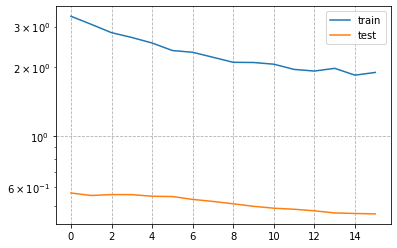

In [7]:
from CP_Detection.Visualization import PlotHistory
PlotHistory(hist_load)

In [4]:
AbstractBlock = 'C:32|C:32|C:32:C:32'

In [5]:
import re
pattern = re.compile('[P,C]:[1-9]\d*\|{1,}[P,C]:[1-9]\d*')

In [6]:
print(re.match(pattern, AbstractBlock))

<_sre.SRE_Match object; span=(0, 9), match='C:32|C:32'>


In [23]:
pattern = re.compile('^[P,C]:\d+\|$')
print(re.search(pattern, 'P:32|'))

<_sre.SRE_Match object; span=(0, 5), match='P:32|'>


In [52]:
AbstractBlock.split('|')

['C:32', 'C:32', 'C:32']